## EDA & Visualization

> Still WIP(Work in Progress)

## Import Library & Dataset

In [1]:
!pip install seaborn==0.11
import seaborn as sns

     |████████████████████████████████| 283 kB 1.2 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
train = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-feb-2021/test.csv')

train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.524634,0.506649,0.444115,0.446214,0.455471,0.508337,0.478345,0.455904,0.459321,0.526899,0.504943,0.529938,0.524549,0.503349,7.456260
std,144450.150010,0.204875,0.235269,0.200089,0.238669,0.200695,0.231612,0.192432,0.204493,0.220642,0.204025,0.201549,0.230860,0.220892,0.225218,0.887295
min,1.000000,-0.093505,-0.055105,-0.060274,0.134760,0.189216,-0.087247,0.043953,0.208703,0.004041,0.073040,0.059644,0.064161,-0.005600,0.158121,0.000000
25%,124772.500000,0.370451,0.352307,0.314121,0.214572,0.279853,0.338747,0.339896,0.278041,0.308655,0.361957,0.338898,0.316662,0.332143,0.291289,6.798341
50%,250002.500000,0.492208,0.615156,0.457271,0.377823,0.411351,0.441384,0.410090,0.360736,0.425801,0.488867,0.519855,0.558827,0.407365,0.433909,7.496503
75%,375226.500000,0.654793,0.688150,0.554835,0.719758,0.621808,0.709515,0.604246,0.639388,0.541525,0.752765,0.672809,0.720381,0.732431,0.730870,8.161166
max,499999.000000,1.052666,0.851746,1.017689,1.006469,0.994050,1.044433,1.093312,1.036541,1.014156,0.972091,1.029773,1.038049,0.961370,0.873579,10.309208


## Categorical Feature

One point of this competition is to encode the categorical value again, unlike the previous competition.

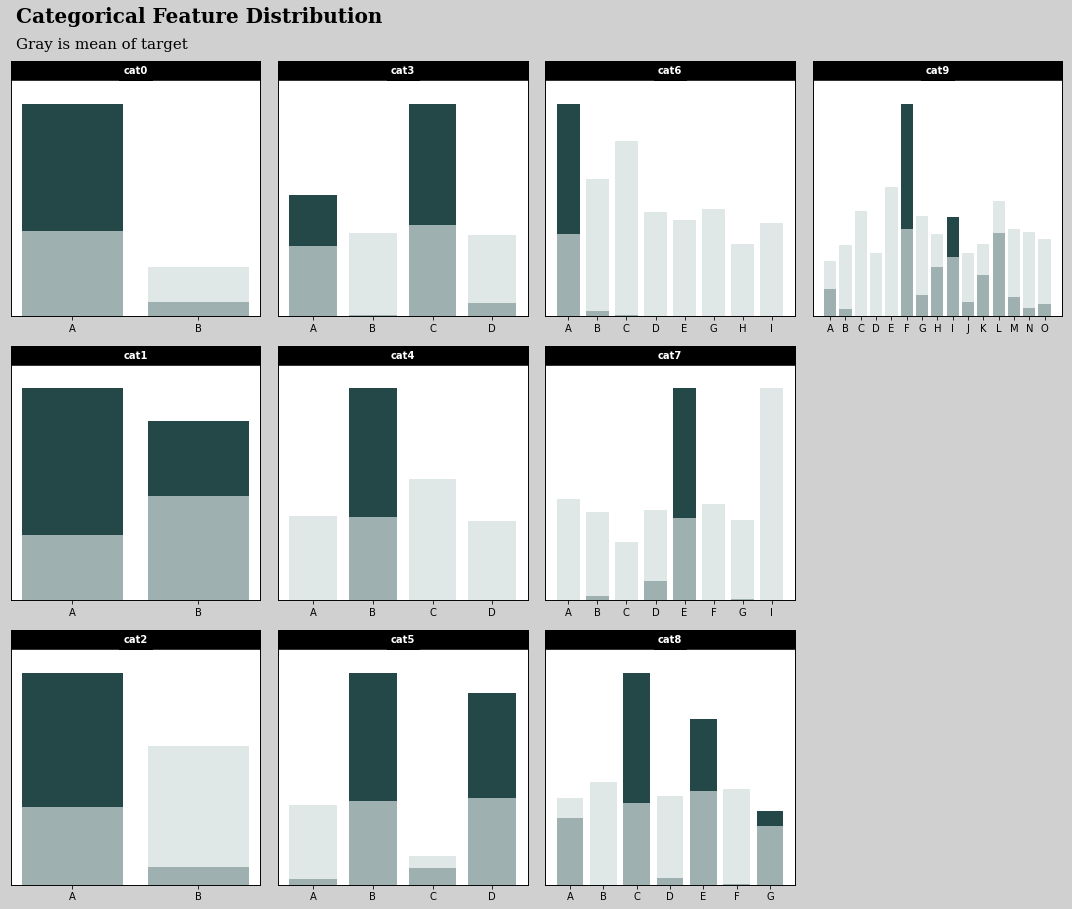

In [4]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
fig.set_facecolor('#d0d0d0') 

for i in range(10):
    # count 
    cnt_tmp = train[f'cat{i}'].value_counts().sort_index()
    ax[i%3][i//3].bar(cnt_tmp.index, cnt_tmp, color='#244747', label='Count')
    ax[i%3][i//3].set_yticks([])
    ax[i%3][i//3].margins(0.05, 0.2)
    
    # target
    target_tmp = train.groupby(f'cat{i}').mean()['target']
    ax2=ax[i%3][i//3].twinx()
    ax2.set_yticks([])
    ax2.bar(target_tmp.index, target_tmp, color='#d4dddd', alpha=0.7, label='Mean of Target')
    ax2.set_ylim(7, 8.4)
    
    divider = make_axes_locatable(ax[i%3][i//3])
    cax = divider.append_axes("top", size="8%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(f'cat{i}', loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[1][3].set_visible(False)
ax[2][3].set_visible(False)

fig.text(0.018, 1.03, 'Categorical Feature Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.018, 1, 'Gray is mean of target', fontsize=15, fontweight='light', fontfamily='serif')



plt.tight_layout()
plt.show()

## Categorical Value Relation Heatmap


some combination between `cat6`~`cat9` have **absolutly** lower value(mean of target).

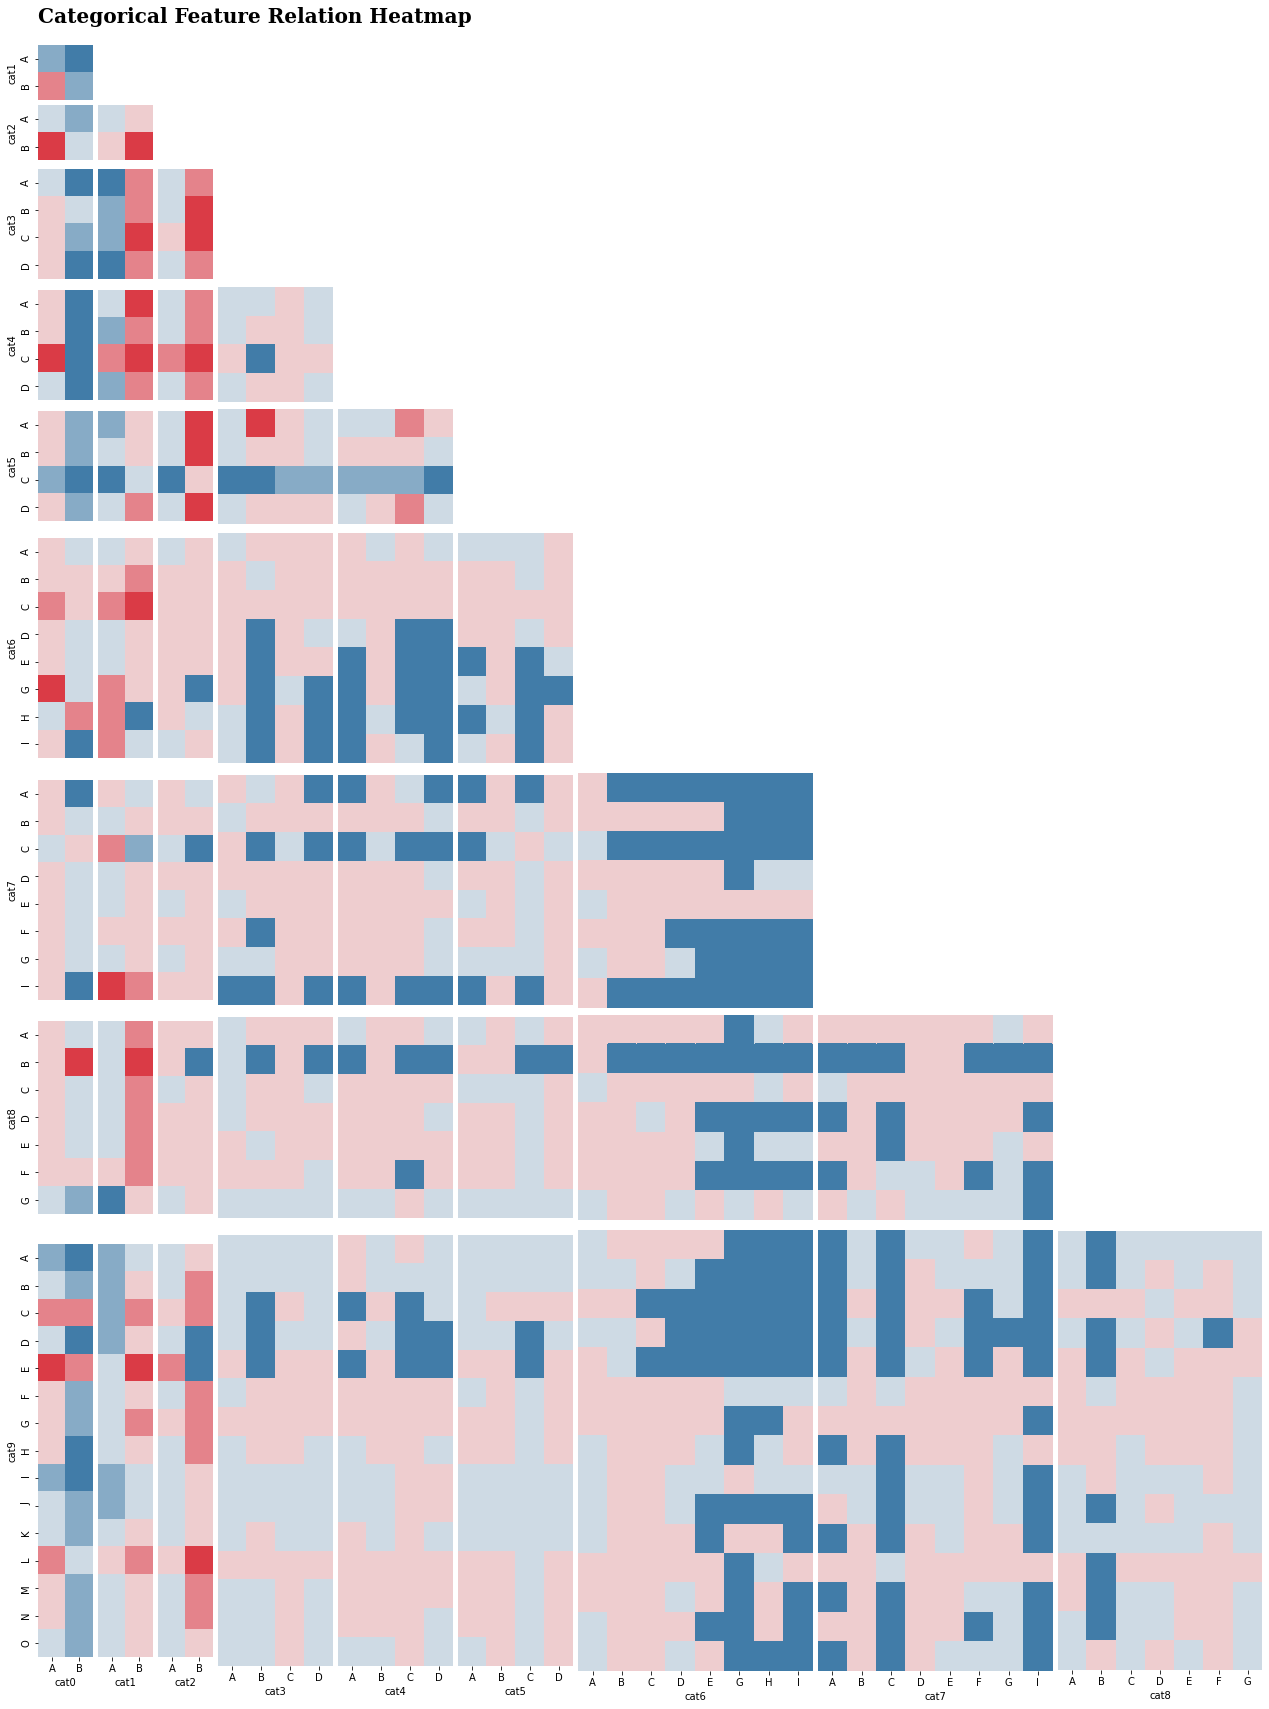

In [5]:
fig = plt.figure(figsize=(30, 30))
gs = fig.add_gridspec(sum([len(train[f'cat{i}'].unique()) for i in range(1, 10)]), 
                     sum([len(train[f'cat{i}'].unique()) for i in range(10)]))

idx = np.cumsum([0] + [len(train[f'cat{i}'].unique()) for i in range(10)])

         
for i in range(10):
    for j in range(10):
        if i <= j : 
            continue
        pivot_tmp = pd.pivot_table(train, values='target', index=[f'cat{i}'], columns=[f'cat{j}'], aggfunc=np.mean, fill_value=0)
        ax = fig.add_subplot(gs[idx[i]-2:idx[i+1]-2, idx[j]:idx[j+1]])
        
        sns.heatmap(pivot_tmp, 
                    square=True, 
                    center=7.456, # mean of target
                    cbar=False, 
                    cmap=sns.diverging_palette(240, 10),
                    xticklabels=(i==9), yticklabels=(j==0),
                    ax=ax)

        if j : ax.set_ylabel('')    
        if i<9 : ax.set_xlabel('')

fig.text(0.125, 0.89, 'Categorical Feature Relation Heatmap', fontsize=20, fontweight='bold', fontfamily='serif')            

plt.show()

## Continuous 



Obviously, continuous variables also have a bias according to their central distribution.

For visualization, sample and visualize some.

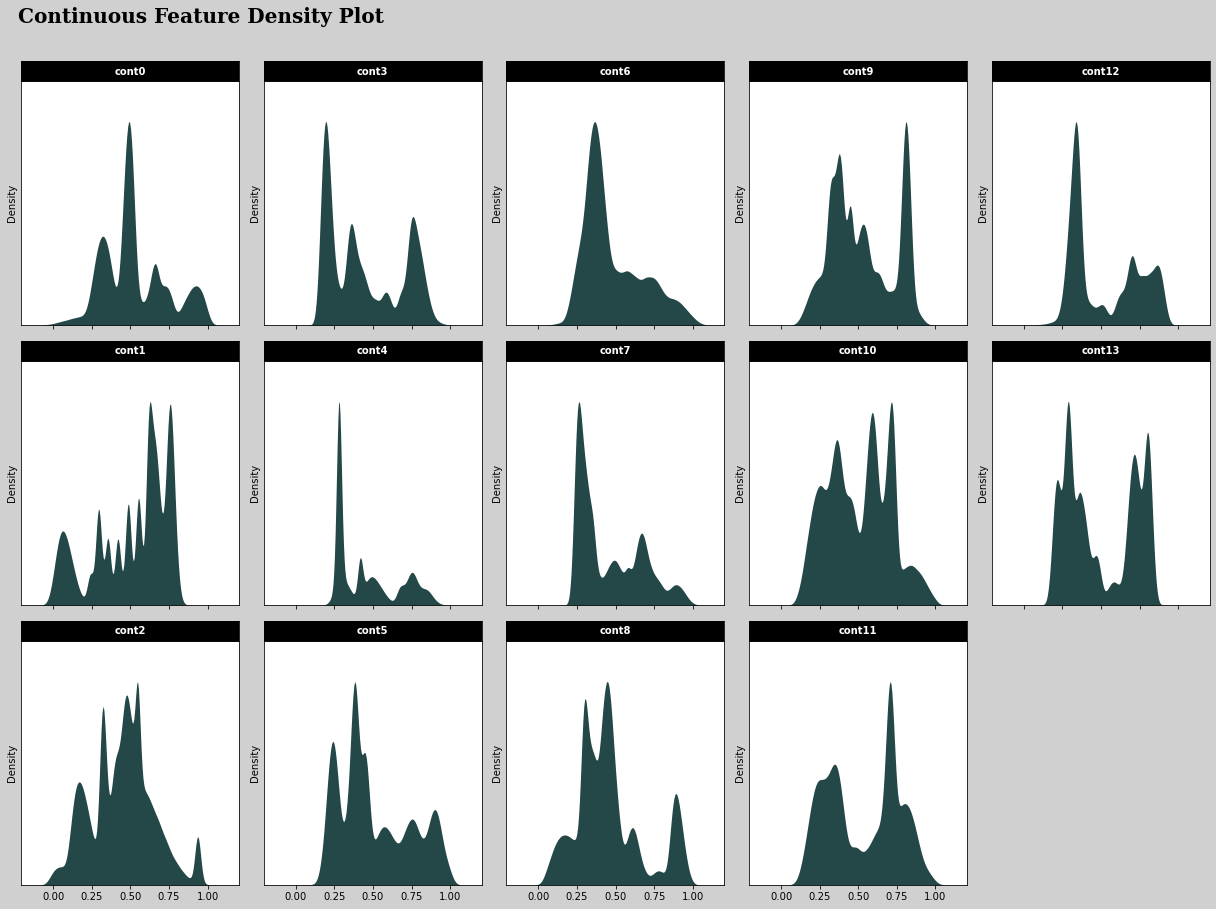

In [6]:
fig, ax = plt.subplots(3, 5, figsize=(17, 12), sharex=True)
fig.set_facecolor('#d0d0d0') 

for i in range(14): 
    sns.kdeplot(data=train, x=f'cont{i}', 
                fill=True,
                linewidth=0,
                color='#244747', alpha=1,
                ax=ax[i%3][i//3])
    ax[i%3][i//3].set_yticks([])
    ax[i%3][i//3].set_xlabel('',visible=False)
    ax[i%3][i//3].margins(0.05, 0.2)
    
    # dviider
    divider = make_axes_locatable(ax[i%3][i//3])
    cax = divider.append_axes("top", size="8%", pad=0)
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_facecolor('black')

    at = AnchoredText(f'cont{i}', loc=10, 
                      prop=dict(backgroundcolor='black',
                                size=10, color='white', weight='bold'))
    cax.add_artist(at)
    
ax[-1][-1].set_visible(False)
fig.text(0.018, 1.03, 'Continuous Feature Density Plot', fontsize=20, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

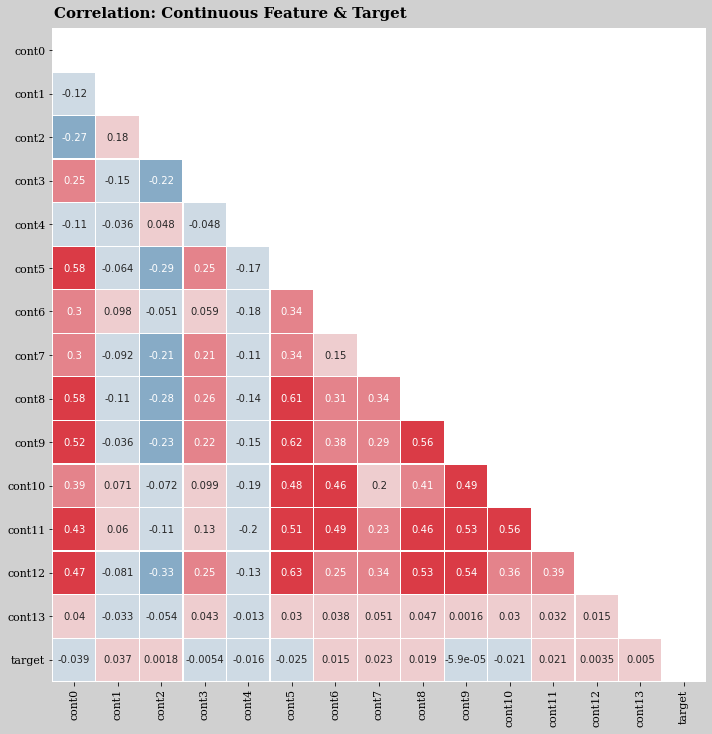

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.set_facecolor('#d0d0d0') 
corr = train.drop('id', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, 
            square=True, 
            linewidth=0.2,
            cbar=False,
            mask=mask,
            annot=True,
            center=0,
            cmap=sns.diverging_palette(240, 10),
            ax=ax)

fig.text(0.075, 1, 'Correlation: Continuous Feature & Target', fontweight='bold', fontfamily='serif', fontsize=15) 
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.tight_layout()
plt.show()

For relation, check i use `pariplot`

Sampling is nice choices for Large data

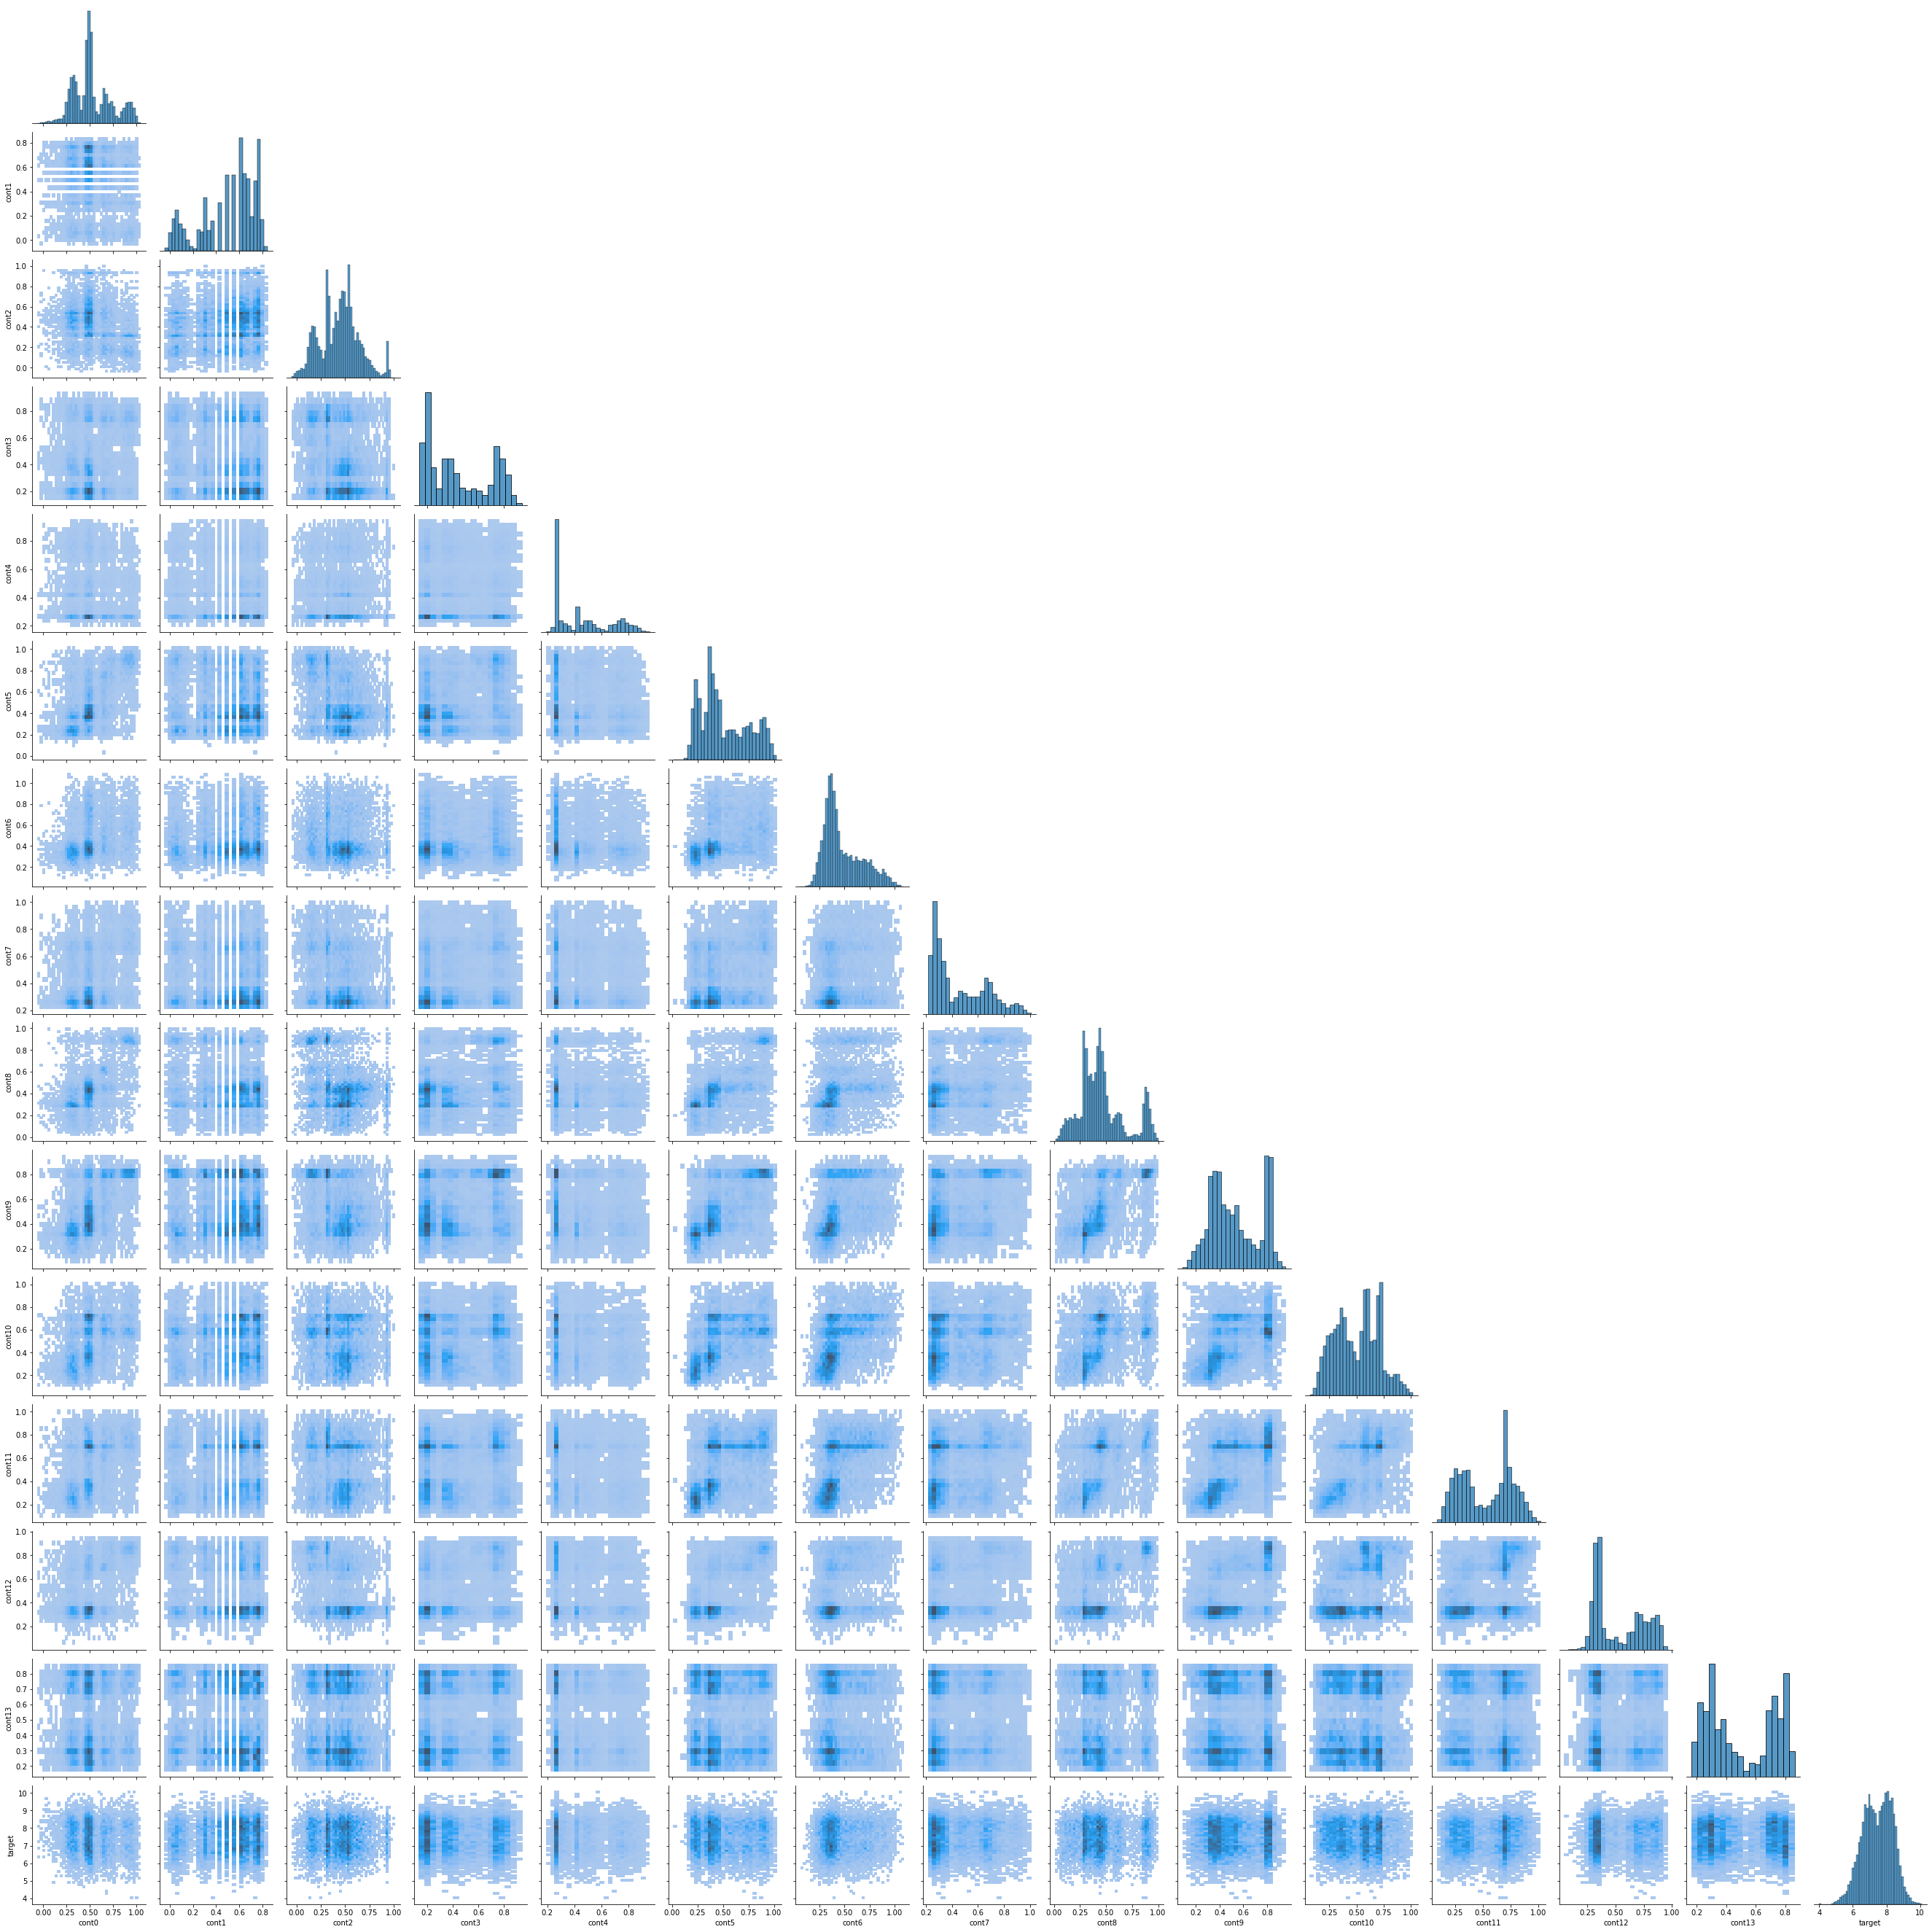

In [8]:
sns.pairplot(train.iloc[:,11:].sample(10000), kind="hist", corner=True)